In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from seaborn import set_style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits import mplot3d
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
set_style("darkgrid")


In [2]:
clTrials = pd.read_csv("Cleaned_and_Modified_Data.csv")

In [3]:
clTrials

,Unnamed: 0,Rank,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,...,Male,Metastatic,Phases Num,Completed Status,Minimum Age,Hospital,Intervention Model,Intervention_model_string,Masking,Completed_Status
0,1,2,A Phase II Study of Nivolumab in Combination W...,Completed,Has Results,Breast Cancer,Drug: Nivolumab|Drug: Cabozantinib,Overall Response Rate|Number of Participants W...,Female,"18 Years and older (Adult, Older Adult)",...,0,0,3.0,1,18,0,5,Single Group Assignment,0,1
1,3,4,Fulvestrant Plus Enzalutamide in ER+/Her2- Adv...,Completed,Has Results,Breast Cancer,Drug: Fulvestrant with Enzalutamide,Clinical Benefit Rate of the Combination of En...,Female,"18 Years to 100 Years (Adult, Older Adult)",...,0,0,3.0,1,18,1,5,Single Group Assignment,0,1
2,8,9,4D Image-Guided Partial Breast Radiation in St...,Completed,Has Results,Breast Cancer,Radiation: 4D Conformal Image-Guided Partial B...,Patients With Reduction in Incidental Radiatio...,Female,"50 Years and older (Adult, Older Adult)",...,0,0,0.0,1,50,1,5,Single Group Assignment,0,1
3,13,14,Intrathecal Trastuzumab for Leptomeningeal Met...,Completed,Has Results,Breast Cancer,Radiation: Trastuzumab,Number of Dose Limiting Toxicities (DLT) of IT...,All,"18 Years and older (Adult, Older Adult)",...,0,0,2.0,1,18,1,4,Sequential Assignment,0,1
4,15,16,A Study of Eribulin Mesylate With Trastuzumab ...,Completed,Has Results,Breast Cancer,Drug: E7389,Number of Participants With Dose Limiting Toxi...,Female,"20 Years to 74 Years (Adult, Older Adult)",...,0,0,1.0,1,20,0,5,Single Group Assignment,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,11185,11186,Human IL-15 (rhIL-15) and Obinutuzumab for Rel...,Terminated,Has Results,Leukemia|Lymphocytic|Chronic|B-Cell,Drug: rhIL-15|Biological: Obinutuzumab,Number of Treatment-emergent Adverse Events (A...,All,"18 Years and older (Adult, Older Adult)",...,0,0,1.0,0,18,1,4,Sequential Assignment,0,0
4416,11186,11187,"BN-Brachyury, Entinostat, Adotrastuzumab Emtan...",Terminated,Has Results,Breast Cancer|Triple Negative Breast Cancer|HE...,Biological: Brachyury-TRICOM|Drug: Entinostat|...,Overall Response (Partial Response + Complete ...,All,"18 Years and older (Adult, Older Adult)",...,0,1,1.0,0,18,1,4,Sequential Assignment,0,0
4417,11187,11188,Optune Device - TT Field Plus Nivolumab and Ip...,Terminated,Has Results,Melanoma With Brain Metastasis,Device: Optune|Biological: Nivolumab|Biologica...,Intracranial Progression-free Survival|Overall...,All,"18 Years and older (Adult, Older Adult)",...,0,0,3.0,0,18,1,5,Single Group Assignment,0,0
4418,11193,11194,Immune Checkpoint Inhibitor M7824 and the Immu...,Terminated,Has Results,Histologically or Cytologically Confirmed Panc...,Drug: M7824|Drug: M9241|Radiation: SBRT,Recommended Phase 2 Dose (RP2D) of NHS-IL12 (M...,All,"18 Years and older (Adult, Older Adult)",...,0,1,2.0,0,18,1,4,Sequential Assignment,0,0


In [4]:
clTrials_train, clTrials_test = train_test_split(clTrials.copy(), 
                                            shuffle=True,
                                            random_state=314,
                                            stratify=clTrials['Completed_Status'],
                                            test_size=.2)

In [5]:
clTrials_completed = clTrials[clTrials["Status"]=="Completed"]
clTrials_not_completed = clTrials[clTrials["Status"]!="Completed"]

In [6]:
clTrials_train_modified = clTrials_train[clTrials_train['Enrollment'] <= 1500]
clTrials_test_modified = clTrials_test[clTrials_test['Enrollment'] <= 1500]

## Use k-nearest neighbor model.

In [7]:
TEST = list(clTrials_test_modified['Completed_Status'])
TRAIN = list(clTrials_train_modified['Completed_Status'])

# Function that applies knn to k neighbours with features p,q,r
## Applying to the training set
def knn_for_three_features_pred_train(k,p,q,r):
    a = KNeighborsClassifier(k)
    a.fit(clTrials_train_modified[[p, q, r]],clTrials_train_modified.Completed_Status)
    return a.predict(clTrials_train_modified[[p, q, r]])
def knn_for_three_features_err_train(k,p,q,r):
    c=0
    a = knn_for_three_features_pred_train(k,p,q,r)
    for i in range(len(a)):
        if a[i] == TRAIN[i]:
            c = c+1
    return c/len(a)

In [8]:
# Function that applies knn to k neighbours with features p,q,r
## Applying to the testing set
def knn_for_three_features_pred_test(k,p,q,r):
    a = KNeighborsClassifier(k)
    a.fit(clTrials_train_modified[[p, q, r]],clTrials_train_modified.Completed_Status)
    return a.predict(clTrials_test_modified[[p, q, r]])
def knn_for_three_features_err_test(k,p,q,r):
    c=0
    b = knn_for_three_features_pred_test(k,p,q,r)
    for i in range(len(b)):
        if b[i] == TEST[i]:
            c = c+1
    return c/len(b)

In [9]:
alpha = knn_for_three_features_err_train(19,"Enrollment","Study Duration (months)","Intervention Model")
alpha

0.8272027373823782

In [10]:
beta = knn_for_three_features_err_test(19,"Enrollment","Study Duration (months)","Intervention Model")
beta

0.8256880733944955

In [11]:
cm_train = confusion_matrix(TRAIN,knn_for_three_features_pred_train(19,"Enrollment","Study Duration (months)","Intervention Model"))

In [12]:
cm_test = confusion_matrix(TEST,knn_for_three_features_pred_test(19,"Enrollment","Study Duration (months)","Intervention Model"))

In [13]:
TEST = list(clTrials_test_modified['Completed_Status'])
TRAIN = list(clTrials_train_modified['Completed_Status'])

def accuracy_train(preds):
    c = 0
    for j in range(len(preds)):
        if preds[j] == TRAIN[j]:
            c = c+1
    return c/len(preds)

def accuracy_test(preds):
    c = 0
    for j in range(len(preds)):
        if preds[j] == TEST[j]:
            c = c+1
    return c/len(preds)

def f1_score(recall, precision):
    return 2*(recall)*precision/(recall+precision)
pred_train = knn_for_three_features_pred_train(19,"Enrollment","Study Duration (months)","Intervention Model")
pred_test = knn_for_three_features_pred_test(19,"Enrollment","Study Duration (months)","Intervention Model")


TN_train_knn = confusion_matrix(TRAIN,pred_train)[0,0]
FP_train_knn = confusion_matrix(TRAIN, pred_train)[0,1]
FN_train_knn = confusion_matrix(TRAIN, pred_train)[1,0]
TP_train_knn = confusion_matrix(TRAIN, pred_train)[1,1]
ac_train_knn = accuracy_train(pred_train)
pr_train_knn = np.round(TP_train_knn/(FP_train_knn + TP_train_knn), 4)
re_train_knn = np.round(TP_train_knn/(FN_train_knn + TP_train_knn), 4)
f1_train_knn = f1_score(re_train_knn, pr_train_knn)
ROC_train_knn = (np.round(TP_train_knn/(TP_train_knn+FN_train_knn),4) + np.round(TN_train_knn/(TN_train_knn+FP_train_knn),4))/2


TN_test_knn = confusion_matrix(TEST,pred_test)[0,0]
FP_test_knn = confusion_matrix(TEST, pred_test)[0,1]
FN_test_knn = confusion_matrix(TEST, pred_test)[1,0]
TP_test_knn = confusion_matrix(TEST, pred_test)[1,1]
ac_test_knn = accuracy_test(pred_test)
pr_test_knn = np.round(TP_test_knn/(FP_test_knn + TP_test_knn), 4)
re_test_knn = np.round(TP_test_knn/(FN_test_knn + TP_test_knn), 4)
f1_test_knn = f1_score(re_test_knn, pr_test_knn)
ROC_test_knn = (np.round(TP_test_knn/(TP_test_knn+FN_test_knn),4) + np.round(TN_test_knn/(TN_test_knn+FP_test_knn),4))/2

print("Accuracy train = ", ac_train_knn)
print("Precision train = ", pr_train_knn)
print("Recall train = ", re_train_knn)  
print("f1 train = ",f1_train_knn) 
print("ROC train = ", ROC_train_knn)

print("Accuracy test = ", ac_test_knn)
print("Precision test = ", pr_test_knn)
print("Recall test = ", re_test_knn)  
print("f1 test = ",f1_test_knn) 
print("ROC test = ", ROC_test_knn)

Accuracy train =  0.8272027373823782
Precision train =  0.8409
Recall train =  0.9394
f1 train =  0.8874251081278436
ROC train =  0.73525
Accuracy test =  0.8256880733944955
Precision test =  0.8438
Recall test =  0.932
f1 test =  0.8857096519878365
ROC test =  0.7389


In [14]:
# For graphing the number of neighbours for knn versus error
inp = [2*i+1 for i in range(18)]
def graph(p,q,r):
    out = [knn_for_three_features_err_test(k,p,q,r) for k in inp]
    plt.plot(inp,out,color = 'b')
    plt.xlabel('No. of Neighbours')
    plt.ylabel('Accuracy on Test set')
    #plt.savefig('KNN.png')

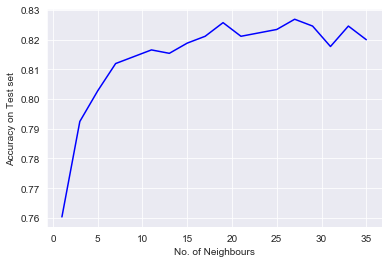

In [15]:
graph("Enrollment","Study Duration (months)","Intervention Model")

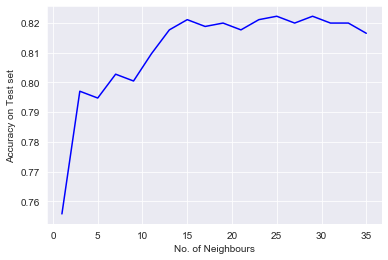

In [16]:
graph("Enrollment","Study Duration (months)","Minimum Age")

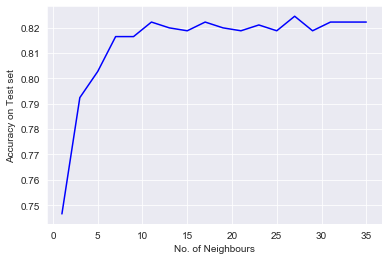

In [17]:
graph("Enrollment","Study Duration (months)","Hospital")

### With k-nearest approach, where k=5, we get 80% accuracy. With k = 19, we get ~83% with features Enrollment, Study Duration and Intervention Model.

## Now use Decision Tree Classifier

In [18]:
# Defining a function that takes depth of the decision tree and features as input and gives out acurracy
TEST = list(clTrials_test['Completed_Status'])
TRAIN = list(clTrials_train['Completed_Status'])
def decision_tree_train(depth,features):
    X = np.array([[list(clTrials_train[features[j]])[i] for j in range(len(features))] for i in range(len(clTrials_train["Enrollment"]))])
    y = np.array(clTrials_train["Completed_Status"])
    #X_test = np.array([[list(clTrials_test[features[j]])[i] for j in range(len(features))] for i in range(len(clTrials_test["Enrollment"]))])
    tree = DecisionTreeClassifier(max_depth  = depth)
    tree.fit(X,y)
    preds = tree.predict(X)
#     c=0
#     for j in range(len(preds)):
#         if preds[j] == TEST[j]:
#             c = c+1
#     return c/len(preds)
    return preds

def decision_tree_test(depth,features):
    X = np.array([[list(clTrials_train[features[j]])[i] for j in range(len(features))] for i in range(len(clTrials_train["Enrollment"]))])
    y = np.array(clTrials_train["Completed_Status"])
    X_test = np.array([[list(clTrials_test[features[j]])[i] for j in range(len(features))] for i in range(len(clTrials_test["Enrollment"]))])
    tree = DecisionTreeClassifier(max_depth  = depth)
    tree.fit(X,y)
    preds = tree.predict(X_test)
#     c=0
#     for j in range(len(preds)):
#         if preds[j] == TEST[j]:
#             c = c+1
#     return c/len(preds)
    return preds
    

In [19]:
alpha_d = decision_tree_train(4,["Enrollment","Minimum Age","Study Duration (months)"])

In [20]:
beta_d = decision_tree_test(4,["Enrollment","Minimum Age","Study Duration (months)"])

In [21]:
cm_d_train = confusion_matrix(TRAIN,alpha_d)
cm_d_train

array([[ 455,  509],
       [ 115, 2457]], dtype=int64)

In [22]:
cm_d_test = confusion_matrix(TEST,beta_d)
cm_d_test

array([[123, 118],
       [ 35, 608]], dtype=int64)

In [23]:
TEST = list(clTrials_test['Completed_Status'])
TRAIN = list(clTrials_train['Completed_Status'])

def accuracy_train(preds):
    c = 0
    for j in range(len(preds)):
        if preds[j] == TRAIN[j]:
            c = c+1
    return c/len(preds)

def accuracy_test(preds):
    c = 0
    for j in range(len(preds)):
        if preds[j] == TEST[j]:
            c = c+1
    return c/len(preds)

def f1_score(recall, precision):
    return 2*(recall)*precision/(recall+precision)

TN_train_d = cm_d_train[0,0]
FP_train_d = cm_d_train[0,1]
FN_train_d = cm_d_train[1,0]
TP_train_d = cm_d_train[1,1]
ac_train_d = accuracy_train(alpha_d)
pr_train_d = np.round(TP_train_d/(FP_train_d + TP_train_d), 4)
re_train_d = np.round(TP_train_d/(FN_train_d + TP_train_d), 4)
f1_train_d = f1_score(re_train_d, pr_train_d)
ROC_train_d = (np.round(TP_train_d/(TP_train_d+FN_train_d),4) + np.round(TN_train_d/(TN_train_d+FP_train_d),4))/2


TN_test_d = cm_d_test[0,0]
FP_test_d = cm_d_test[0,1]
FN_test_d = cm_d_test[1,0]
TP_test_d = cm_d_test[1,1]
ac_test_d = accuracy_test(beta_d)
pr_test_d = np.round(TP_test_d/(FP_test_d + TP_test_d), 4)
re_test_d = np.round(TP_test_d/(FN_test_d + TP_test_d), 4)
f1_test_d = f1_score(re_test_d, pr_test_d)
ROC_test_d = (np.round(TP_test_d/(TP_test_d+FN_test_d),4) + np.round(TN_test_d/(TN_test_d+FP_test_d),4))/2

print("Accuracy train = ", ac_train_d)
print("Precision train = ", pr_train_d)
print("Recall train = ", re_train_d)  
print("f1 train = ",f1_train_d) 
print("ROC train = ", ROC_train_d)

print("Accuracy test = ", ac_test_d)
print("Precision test = ", pr_test_d)
print("Recall test = ", re_test_d)  
print("f1 test = ",f1_test_d) 
print("ROC test = ", ROC_test_d)

Accuracy train =  0.8235294117647058
Precision train =  0.8284
Recall train =  0.9553
f1 train =  0.8873358972921456
ROC train =  0.71365
Accuracy test =  0.8269230769230769
Precision test =  0.8375
Recall test =  0.9456
f1 test =  0.888273232011665
ROC test =  0.728


In [24]:
#to show overfitting as we increase the depth, we introduce the accuracy function on the tranining set.
TRAIN = list(clTrials_train['Completed_Status'])
def decision_tree_on_training_set(depth,features):
    X = np.array([[list(clTrials_train[features[j]])[i] for j in range(len(features))] for i in range(len(clTrials_train["Enrollment"]))])
    y = np.array(clTrials_train["Completed_Status"])
    #X_test = np.array([[list(clTrials_test[features[j]])[i] for j in range(len(features))] for i in range(len(clTrials_test["Enrollment"]))])
    tree = DecisionTreeClassifier(max_depth  = depth)
    tree.fit(X,y)
    preds = tree.predict(X)
    c=0
    for j in range(len(preds)):
        if preds[j] == TRAIN[j]:
            c = c+1
    return c/len(preds)

In [25]:
decision_tree_on_training_set(5,["Enrollment","Minimum Age","Study Duration (months)"])

0.8257918552036199

In [26]:
Features = ["Enrollment","Study Duration (months)"]
b = [decision_tree_test(i,Features) for i in range(1,16)]
len(b)

15

In [27]:
c = [decision_tree_on_training_set(i,Features) for i in range(1,16)]

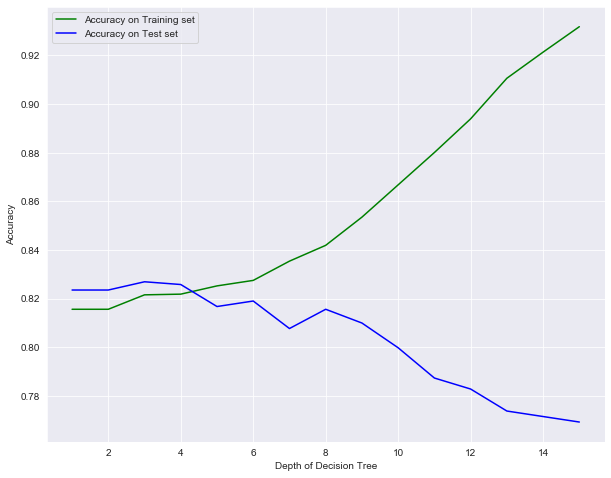

In [28]:
plt.figure(figsize = (10,8))
plt.plot(range(1,16),c,color = 'g',label = 'Accuracy on Training set')
plt.xlabel("Depth of Decision Tree")
plt.ylabel("Accuracy")
plt.plot(range(1,16),[accuracy_test(b[i]) for i in range(0,15)],color = 'b',label = 'Accuracy on Test set')
plt.xlabel("Depth of Decision Tree")
plt.ylabel("Accuracy")
plt.legend(loc = "upper left")
#plt.savefig('Decision_Tree_final.png')
plt.show()

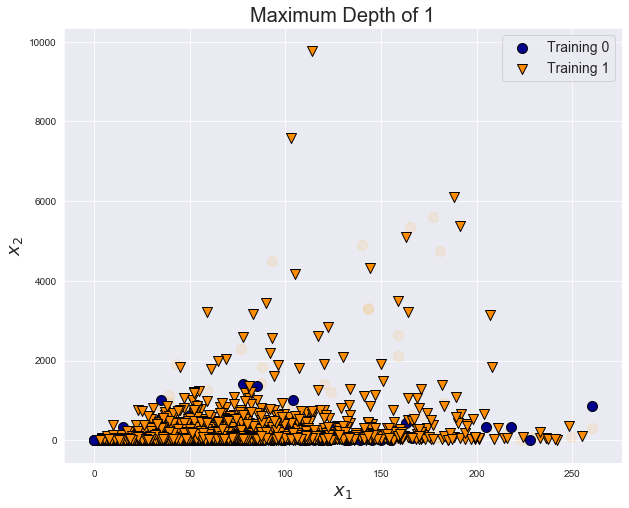

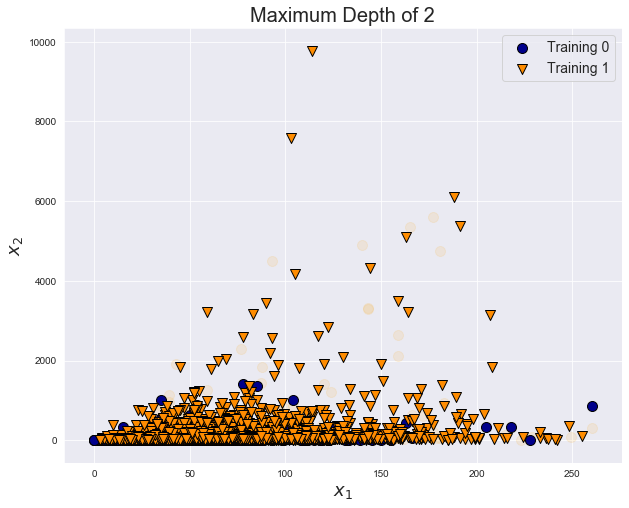

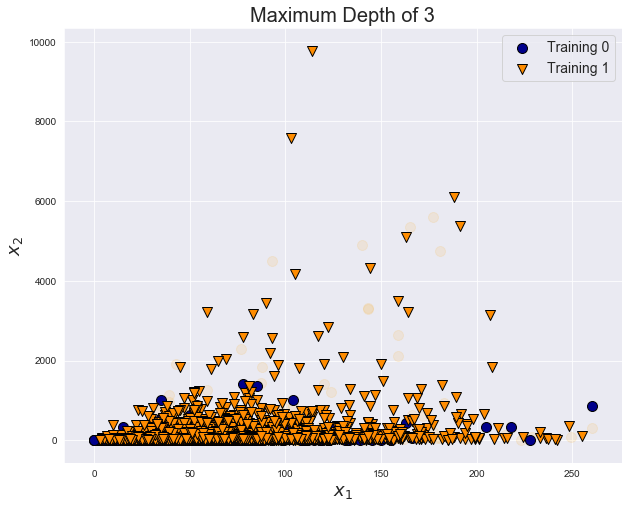

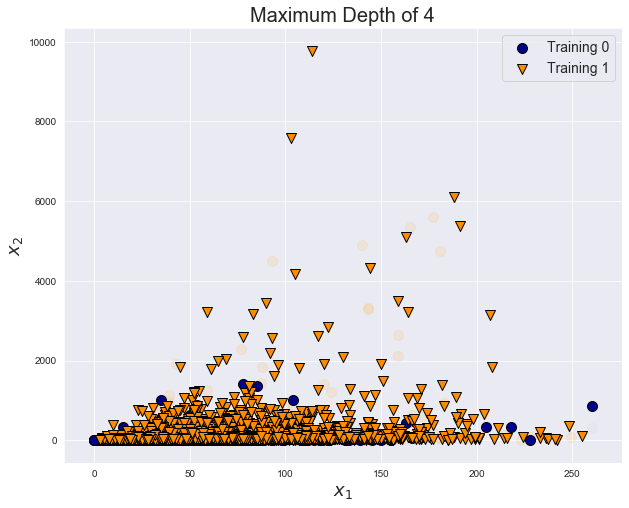

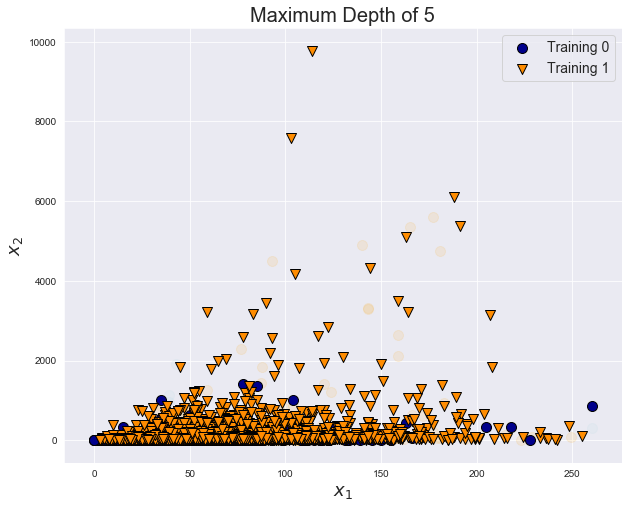

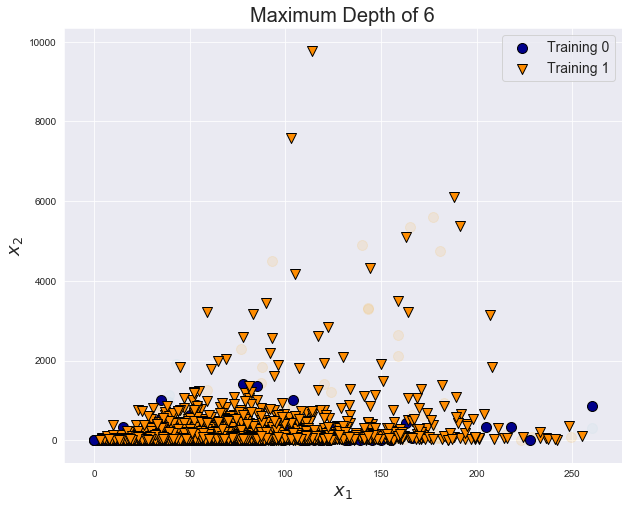

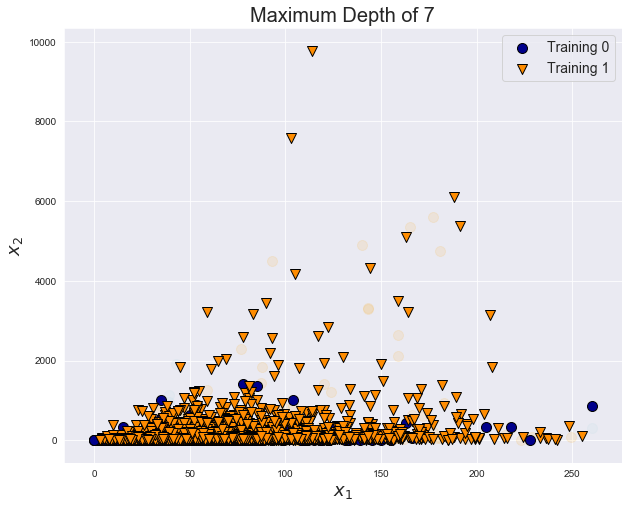

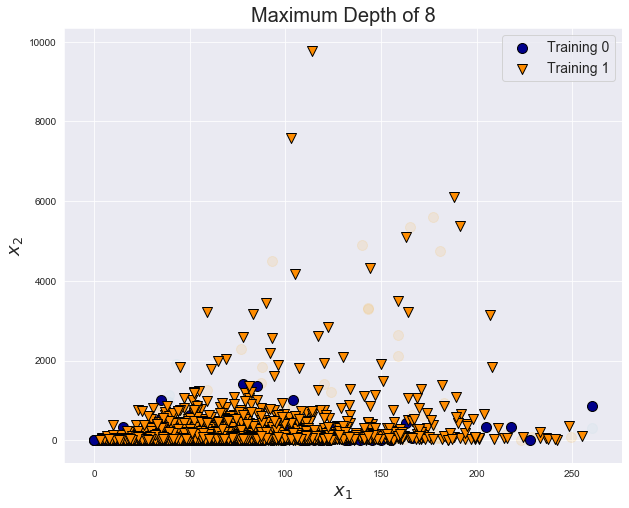

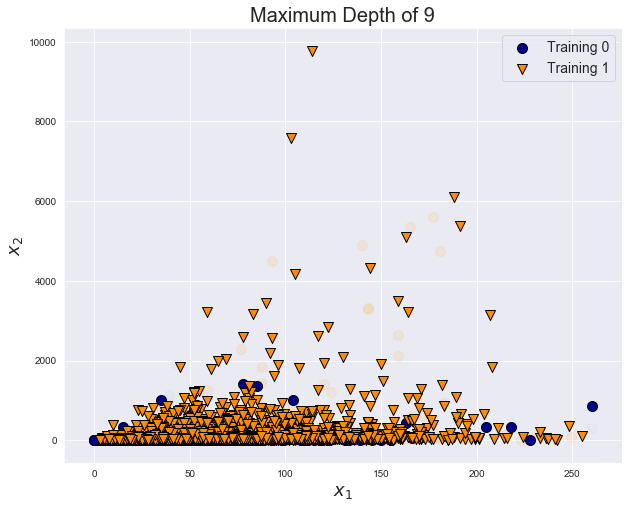

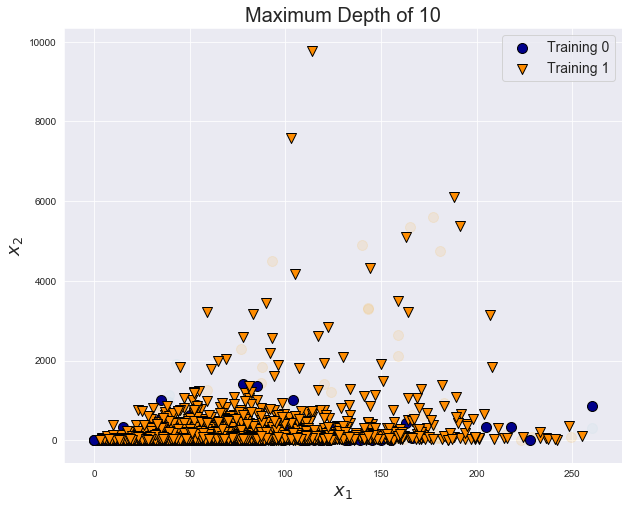

In [29]:
# xx1, xx2 = np.meshgrid(np.arange(-.01, 1.01, .01),
#                           np.arange(-.01, 1.01, .01))

# X_pred = np.zeros((len(xx1.reshape(-1,1)), 2))
# X_pred[:,0] = xx1.flatten()
#X_pred[:,1] = xx2.flatten()
X = np.array([[list(clTrials_train["Study Duration (months)"])[i],list(clTrials_train["Enrollment"])[i]] for i in range(len(clTrials_train["Enrollment"]))])
y = np.array(clTrials_train["Completed_Status"])

X_pred = np.array([[list(clTrials_test["Study Duration (months)"])[i],list(clTrials_test["Enrollment"])[i]] for i in range(len(clTrials_test["Enrollment"]))])


for i in range(1,11):
    tree = DecisionTreeClassifier(max_depth  = i)
    
    tree.fit(X, y)
    
    preds = tree.predict(X_pred)
    
    plt.figure(figsize=(10,8))

    plt.scatter(X_pred[preds==0,0],
                X_pred[preds==0,1],
                alpha=.1,
                c='lightblue',
                s=100)
    plt.scatter(X_pred[preds==1,0],
                X_pred[preds==1,1],
                alpha=.1,
                c='orange',
                s=100)
    
    plt.scatter(X[y==0,0], 
                X[y==0,1],
                label='Training 0',
                c = 'darkblue',
                edgecolor='black',
                s=100)
    plt.scatter(X[y==1,0], 
                X[y==1,1],
                label='Training 1',
                c = 'darkorange',
                marker='v',
                edgecolor='black',
                s=100)
    
    plt.title("Maximum Depth of " + str(i), fontsize=20)
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$x_2$", fontsize=18)
    plt.legend(fontsize=14)
    
    plt.show()


### We do not even see the staircase shape of the decision tree because the two different types of data are mixed with each other. This might suggest Decision Trees might not be the best approach for this data set.

## We will now try a few different types of Support Vector Machines

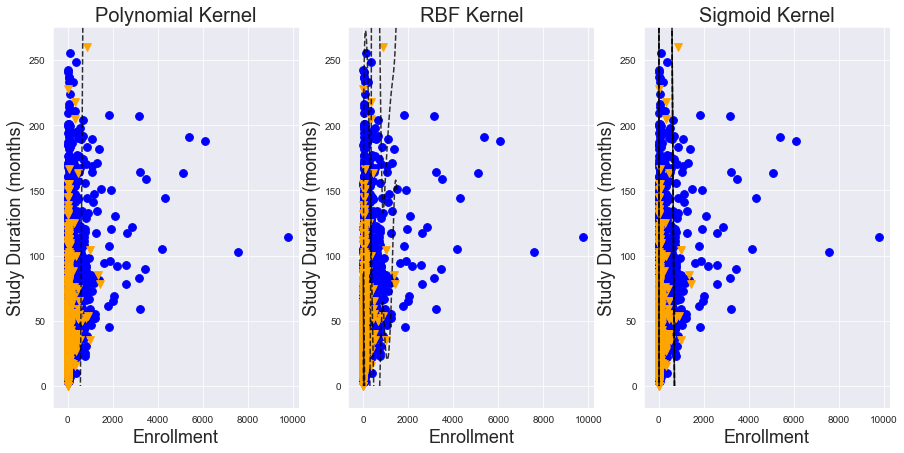

In [30]:
## Using the result above, we will test the poly SVC with the RBF SVC in 2D 

## one with poly, degree=2, C = 10
svc_poly = SVC(kernel = 'poly', degree=2, C=10)

## one with rbf kernel, C = 10
svc_rbf = SVC(kernel = 'rbf', C = 10)

## one with sigmoid, C = 10
svc_sig = SVC(kernel = 'sigmoid', C = 10)

## fit a model

svc_poly.fit(clTrials_train[['Enrollment', 'Study Duration (months)']], clTrials_train.Completed_Status)
svc_rbf.fit(clTrials_train[['Enrollment', 'Study Duration (months)']], clTrials_train.Completed_Status)
svc_sig.fit(clTrials_train[['Enrollment', 'Study Duration (months)']], clTrials_train.Completed_Status)

# get a grid of x1 values
x1x1 = np.linspace(0, 1500, 100)

# get a grid of x2 values
x2x2 = np.linspace(0, 275, 100)

# arrange them in a 2D grid
X1X1, X2X2 = np.meshgrid(x1x1, x2x2)

# make a cleaner array
x1x2 = np.vstack([X1X1.ravel(), X2X2.ravel()]).T

# get the value of the decision function for this grid
Z_poly = svc_poly.decision_function(x1x2).reshape(X1X1.shape)
Z_rbf = svc_rbf.decision_function(x1x2).reshape(X1X1.shape)
Z_sig = svc_sig.decision_function(x1x2).reshape(X1X1.shape)


## Make a figure

fig,ax = plt.subplots(1,3,figsize=(15,7))

## plot the training data
ax[0].scatter(clTrials_train.loc[clTrials_train.Status=='Completed']['Enrollment'],
        clTrials_train.loc[clTrials_train.Status =='Completed']['Study Duration (months)'],
        c='blue',
        s=60,
        label="Not Completed")

ax[0].scatter(clTrials_train.loc[clTrials_train.Status !='Completed']['Enrollment'],
        clTrials_train.loc[clTrials_train.Status !='Completed']['Study Duration (months)'],
        c='orange',
        s=60,
        marker='v',
        label="Completed")

ax[1].scatter(clTrials_train.loc[clTrials_train.Status=='Completed']['Enrollment'],
        clTrials_train.loc[clTrials_train.Status =='Completed']['Study Duration (months)'],
        c='blue',
        s=60,
        label="Not Completed")

ax[1].scatter(clTrials_train.loc[clTrials_train.Status !='Completed']['Enrollment'],
        clTrials_train.loc[clTrials_train.Status !='Completed']['Study Duration (months)'],
        c='orange',
        s=60,
        marker='v',
        label="Completed")

ax[2].scatter(clTrials_train.loc[clTrials_train.Status=='Completed']['Enrollment'],
        clTrials_train.loc[clTrials_train.Status =='Completed']['Study Duration (months)'],
        c='blue',
        s=60,
        label="Not Completed")

ax[2].scatter(clTrials_train.loc[clTrials_train.Status !='Completed']['Enrollment'],
        clTrials_train.loc[clTrials_train.Status !='Completed']['Study Duration (months)'],
        c='orange',
        s=60,
        marker='v',
        label="Completed")


## plot the separating line, and the margins
ax[0].contour(X1X1, X2X2, Z_poly,
              colors='k', levels=[-1,0,1], 
              alpha=.8, linestyles=['--','-','--'])
ax[1].contour(X1X1, X2X2, Z_rbf,
              colors='k', levels=[-1,0,1], 
              alpha=.8, linestyles=['--','-','--'])
ax[2].contour(X1X1, X2X2, Z_sig,
              colors='k', levels=[-1,0,1], 
              alpha=.8, linestyles=['--','-','--'])


ax[0].set_title("Polynomial Kernel", fontsize=20)
ax[1].set_title("RBF Kernel", fontsize=20)
ax[2].set_title("Sigmoid Kernel", fontsize=20)


ax[0].set_xlabel("Enrollment", fontsize=18)
ax[1].set_xlabel("Enrollment", fontsize=18)
ax[2].set_xlabel("Enrollment", fontsize=18)
ax[0].set_ylabel("Study Duration (months)", fontsize=18)
ax[1].set_ylabel("Study Duration (months)", fontsize=18)
ax[2].set_ylabel("Study Duration (months)", fontsize=18)

plt.show()

In [ ]:
def train_SVC_con(y, ker, deg, features):
    X = np.array([[list(clTrials_train[features[j]])[i] for j in range(len(features))] for i in range(len(clTrials_train["Enrollment"]))])
    if ker == 'poly':
            svc_ker = SVC(kernel = 'poly', degree=deg, C=10)
    else:
            svc_ker = SVC(kernel = ker, C=10)

    svc_ker.fit(X,y)
    
    return svc_ker.predict(X)

def accuracy(preds):
    c = 0
    for j in range(len(preds)):
        if preds[j] == TRAIN[j]:
            c = c+1
    return c/len(preds)

def f1_score(recall, precision):
    return 2*(recall)*precision/(recall+precision)


## We also try the 3D version of the models adding in the minimum age feature
y = np.array(clTrials_train["Completed_Status"])

features = ['Enrollment', 'Study Duration (months)', 'Minimum Age']
## one with poly, degree=2, C = 10

preds = train_SVC_con(y, 'poly',  2, features)
TN_poly = confusion_matrix(y, preds)[0,0]
FP_poly = confusion_matrix(y, preds)[0,1]
FN_poly = confusion_matrix(y, preds)[1,0]
TP_poly = confusion_matrix(y, preds)[1,1]

ac_poly = accuracy(preds)
pr_poly = np.round(TP_poly/(FP_poly + TP_poly), 4)
re_poly = np.round(TP_poly/(FN_poly + TP_poly), 4)
f1_poly = f1_score(re_poly, pr_poly)
ROC_poly = (np.round(TP_poly/(TP_poly+FN_poly),4) + np.round(TN_poly/(TN_poly+FP_poly),4))/2
print(ac_poly)
print(pr_poly)
print(re_poly)  
print(f1_poly) 
print(ROC_poly)

preds = train_SVC_con(y, 'rbf',  2, features)
TN_rbf = confusion_matrix(y, preds)[0,0]
FP_rbf = confusion_matrix(y, preds)[0,1]
FN_rbf = confusion_matrix(y, preds)[1,0]
TP_rbf = confusion_matrix(y, preds)[1,1]

ac_rbf = accuracy(preds)
pr_rbf = np.round(TP_rbf/(FP_rbf + TP_rbf), 4)
re_rbf = np.round(TP_rbf/(FN_rbf + TP_rbf), 4)
f1_rbf = f1_score(re_rbf, pr_rbf)
ROC_rbf = (np.round(TP_rbf/(TP_rbf+FN_rbf),4) + np.round(TN_rbf/(TN_rbf+FP_rbf),4))/2
print(ac_rbf)
print(pr_rbf)
print(re_rbf)
print(f1_rbf)
print(ROC_rbf)


preds = train_SVC_con(y, 'sigmoid', 2, features)
TN_sig = confusion_matrix(y, preds)[0,0]
FP_sig = confusion_matrix(y, preds)[0,1]
FN_sig = confusion_matrix(y, preds)[1,0]
TP_sig = confusion_matrix(y, preds)[1,1]

ac_sig = accuracy(preds)
pr_sig = np.round(TP_sig/(FP_sig + TP_sig), 4)
re_sig = np.round(TP_sig/(FN_sig + TP_sig), 4)
f1_sig = f1_score(re_sig, pr_sig)
ROC_sig = (np.round(TP_sig/(TP_sig+FN_sig),4) + np.round(TN_sig/(TN_sig+FP_sig),4))/2

print(ac_sig)
print(pr_sig)
print(re_sig)  
print(f1_sig) 
print(ROC_sig)


In [ ]:
def test_SVC_con(ker, deg, features):
    X = np.array([[list(clTrials_train[features[j]])[i] for j in range(len(features))] for i in range(len(clTrials_train["Enrollment"]))])
    y = np.array(clTrials_train["Completed_Status"])

    if ker == 'poly':
            svc_ker = SVC(kernel = 'poly', degree=deg, C=10)
    else:
            svc_ker = SVC(kernel = ker, C=10)

    svc_ker.fit(X,y)
    X_test = np.array([[list(clTrials_test[features[j]])[i] for j in range(len(features))] for i in range(len(clTrials_test["Enrollment"]))])

    return svc_ker.predict(X_test)

def accuracy_test(preds):
    c = 0
    for j in range(len(preds)):
        if preds[j] == TEST[j]:
            c = c+1
    return c/len(preds)

def f1_score(recall, precision):
    return 2*(recall)*precision/(recall+precision)


## We also try the 3D version of the models adding in the minimum age feature
y = np.array(clTrials_test["Completed_Status"])

features = ['Enrollment', 'Study Duration (months)', 'Minimum Age']
## one with poly, degree=2, C = 10

preds = test_SVC_con('rbf',  2, features)
TN_rbf = confusion_matrix(y, preds)[0,0]
FP_rbf = confusion_matrix(y, preds)[0,1]
FN_rbf = confusion_matrix(y, preds)[1,0]
TP_rbf = confusion_matrix(y, preds)[1,1]

ac_rbf = accuracy_test(preds)
pr_rbf = np.round(TP_rbf/(FP_rbf + TP_rbf), 4)
re_rbf = np.round(TP_rbf/(FN_rbf + TP_rbf), 4)
f1_rbf = f1_score(re_rbf, pr_rbf)
ROC_rbf = (np.round(TP_rbf/(TP_rbf+FN_rbf),4) + np.round(TN_rbf/(TN_rbf+FP_rbf),4))/2
print(ac_rbf)
print(pr_rbf)
print(re_rbf)
print(f1_rbf)
print(ROC_rbf)


preds = test_SVC_con( 'sigmoid', 2, features)
TN_sig = confusion_matrix(y, preds)[0,0]
FP_sig = confusion_matrix(y, preds)[0,1]
FN_sig = confusion_matrix(y, preds)[1,0]
TP_sig = confusion_matrix(y, preds)[1,1]

ac_sig = accuracy_test(preds)
pr_sig = np.round(TP_sig/(FP_sig + TP_sig), 4)
re_sig = np.round(TP_sig/(FN_sig + TP_sig), 4)
f1_sig = f1_score(re_sig, pr_sig)
ROC_sig = (np.round(TP_sig/(TP_sig+FN_sig),4) + np.round(TN_sig/(TN_sig+FP_sig),4))/2

print(ac_sig)
print(pr_sig)
print(re_sig)  
print(f1_sig) 
print(ROC_sig)

